In [32]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, precision_score, recall_score
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.linear_model import LogisticRegression

# https://www.kaggle.com/datasets/muhammadtalharasool/simple-gender-classification?select=gender.csv
df = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/log_reg/gender.csv').iloc[:,:-1]
df.columns = df.columns.str.strip()
df.Gender = df.Gender.str.strip()

In [33]:
df

,Gender,Age,Height (cm),Weight (kg),Occupation,Education Level,Marital Status,Income (USD),Favorite Color
0,male,32,175,70,Software Engineer,Master's Degree,Married,75000,Blue
1,male,25,182,85,Sales Representative,Bachelor's Degree,Single,45000,Green
2,female,41,160,62,Doctor,Doctorate Degree,Married,120000,Purple
3,male,38,178,79,Lawyer,Bachelor's Degree,Single,90000,Red
4,female,29,165,58,Graphic Designer,Associate's Degree,Single,35000,Yellow
...,...,...,...,...,...,...,...,...,...
126,female,32,170,64,Nurse,Associate's Degree,Single,60000,Orange
127,male,38,176,79,Project Manager,Bachelor's Degree,Married,90000,Black
128,female,27,162,55,Graphic Designer,Associate's Degree,Single,55000,Green
129,male,33,175,77,Sales Representative,Bachelor's Degree,Married,80000,Yellow


<AxesSubplot:>

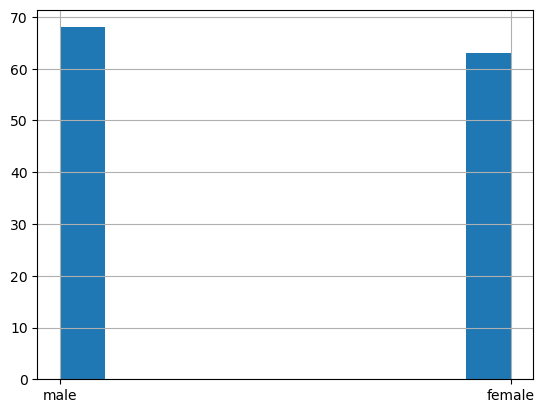

In [34]:
df.Gender.hist()

In [35]:
df.head()

,Gender,Age,Height (cm),Weight (kg),Occupation,Education Level,Marital Status,Income (USD),Favorite Color
0,male,32,175,70,Software Engineer,Master's Degree,Married,75000,Blue
1,male,25,182,85,Sales Representative,Bachelor's Degree,Single,45000,Green
2,female,41,160,62,Doctor,Doctorate Degree,Married,120000,Purple
3,male,38,178,79,Lawyer,Bachelor's Degree,Single,90000,Red
4,female,29,165,58,Graphic Designer,Associate's Degree,Single,35000,Yellow


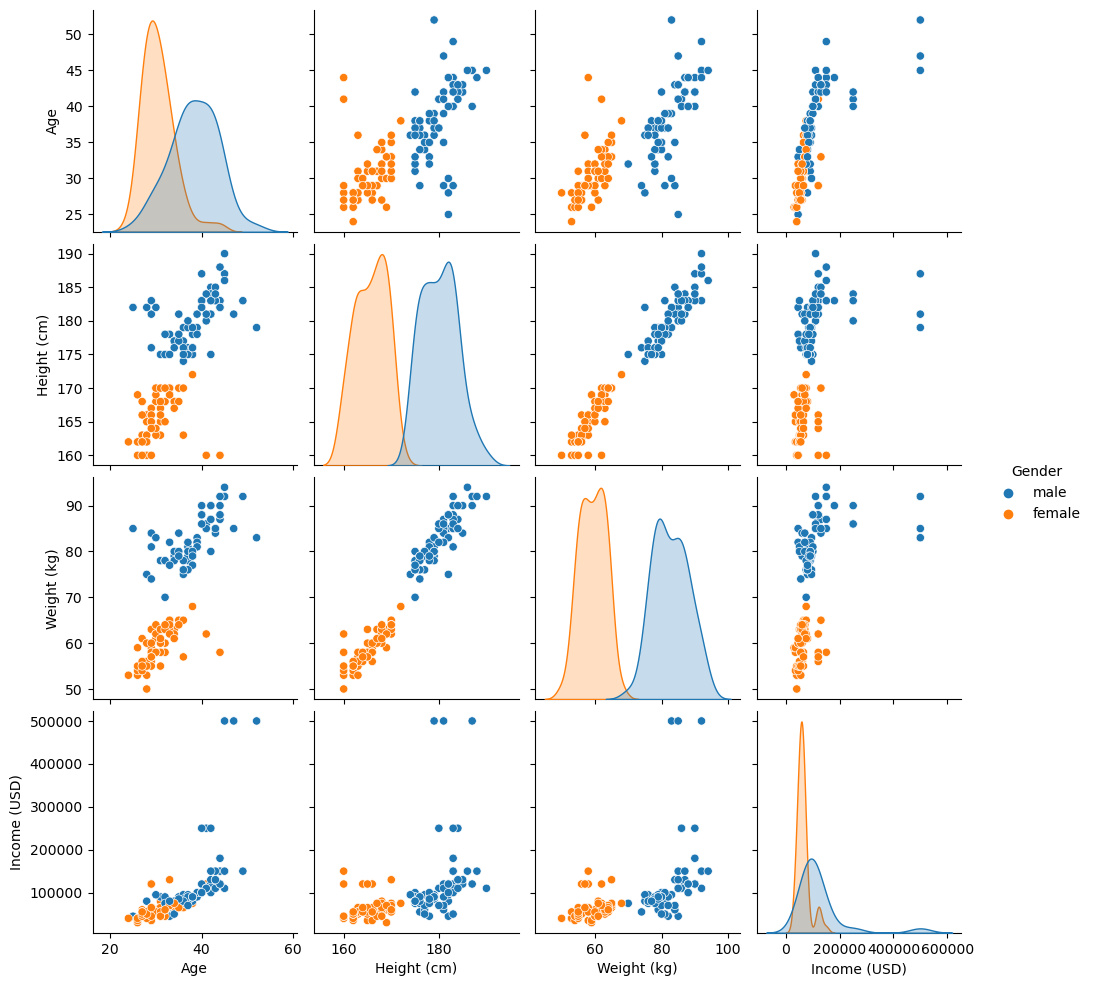

In [36]:
sns.pairplot(df, hue='Gender')

In [37]:
df1=df.drop(df[["Income (USD)","Gender"]],axis=1)
df1

,Age,Height (cm),Weight (kg),Occupation,Education Level,Marital Status,Favorite Color
0,32,175,70,Software Engineer,Master's Degree,Married,Blue
1,25,182,85,Sales Representative,Bachelor's Degree,Single,Green
2,41,160,62,Doctor,Doctorate Degree,Married,Purple
3,38,178,79,Lawyer,Bachelor's Degree,Single,Red
4,29,165,58,Graphic Designer,Associate's Degree,Single,Yellow
...,...,...,...,...,...,...,...
126,32,170,64,Nurse,Associate's Degree,Single,Orange
127,38,176,79,Project Manager,Bachelor's Degree,Married,Black
128,27,162,55,Graphic Designer,Associate's Degree,Single,Green
129,33,175,77,Sales Representative,Bachelor's Degree,Married,Yellow


In [46]:
df11=pd.get_dummies(df1,columns=['Occupation','Education Level','Marital Status','Favorite Color'])
df11

,Age,Height (cm),Weight (kg),Occupation_ Accountant,Occupation_ Analyst,Occupation_ Architect,Occupation_ Business Analyst,Occupation_ Business Consultant,Occupation_ CEO,Occupation_ Doctor,...,Favorite Color_ Yellow,Favorite Color_Black,Favorite Color_Blue,Favorite Color_Green,Favorite Color_Grey,Favorite Color_Orange,Favorite Color_Pink,Favorite Color_Purple,Favorite Color_Red,Favorite Color_Yellow
0,32,175,70,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,25,182,85,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,41,160,62,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,38,178,79,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,29,165,58,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,32,170,64,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
127,38,176,79,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
128,27,162,55,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
129,33,175,77,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [65]:
y=df.iloc[:,0].values

In [66]:
X=df11.values

In [86]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=10)

In [87]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [88]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()
log_reg.fit(X_train,y_train)

LogisticRegression()

In [89]:
y_pred=log_reg.predict(X_test)

In [90]:
print("Training Accuracy:{:.7f}".format(log_reg.score(X_train,y_train)))

print('Testing Accuracy:{:.7f}'.format(log_reg.score(X_test,y_test)))

Training Accuracy:1.0000000
Testing Accuracy:0.9259259


In [91]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[14  2]
 [ 0 11]]
